<a href="https://colab.research.google.com/github/Abjit0/Final-course-work/blob/main/2438417_AbjitMaharjan_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Ai_final portfolio

Mounted at /content/drive
/content/drive/MyDrive/Ai_final portfolio


**Install & Import Necessary Libraries**

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

**Load Dataset**

In [3]:


df = pd.read_csv("Urban_Air_Quality_and_Health_Impact_Dataset.csv")
# Check available columns
print("Available columns:", df.columns)

Available columns: Index(['datetime', 'datetimeEpoch', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'pressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch',
       'moonphase', 'conditions', 'description', 'icon', 'stations', 'source',
       'City', 'Temp_Range', 'Heat_Index', 'Severity_Score', 'Condition_Code',
       'Month', 'Season', 'Day_of_Week', 'Is_Weekend', 'Health_Risk_Score'],
      dtype='object')


**Explore Data**

In [4]:

print("Dataset Overview:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  preciptype         378 non-null    object 
 14  snow               1000 non-null   float64
 15  snowdepth          929 non-null    float64
 16  windgus

**Handle Missing Values (Fill or Drop)**

In [5]:

# df = df.dropna()  # You can also use df.fillna(method='ffill') if required
# Instead of dropping, try filling missing values:
df = df.fillna(method='ffill')  # Forward fill missing values
# or
# df = df.fillna(df.mean())  # Fill with the mean of each column

# After this change, ensure X and y are created from the updated 'df'
X = df.drop(columns=['Health_Risk_Score'])  # Use the correct column name here
y = df['Health_Risk_Score']

# You can print the shape of X and y to confirm if they have data:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1000, 45)
Shape of y: (1000,)


<ipython-input-5-75145b8c8514>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill missing values


**Visualize Feature Distributions (EDA)**

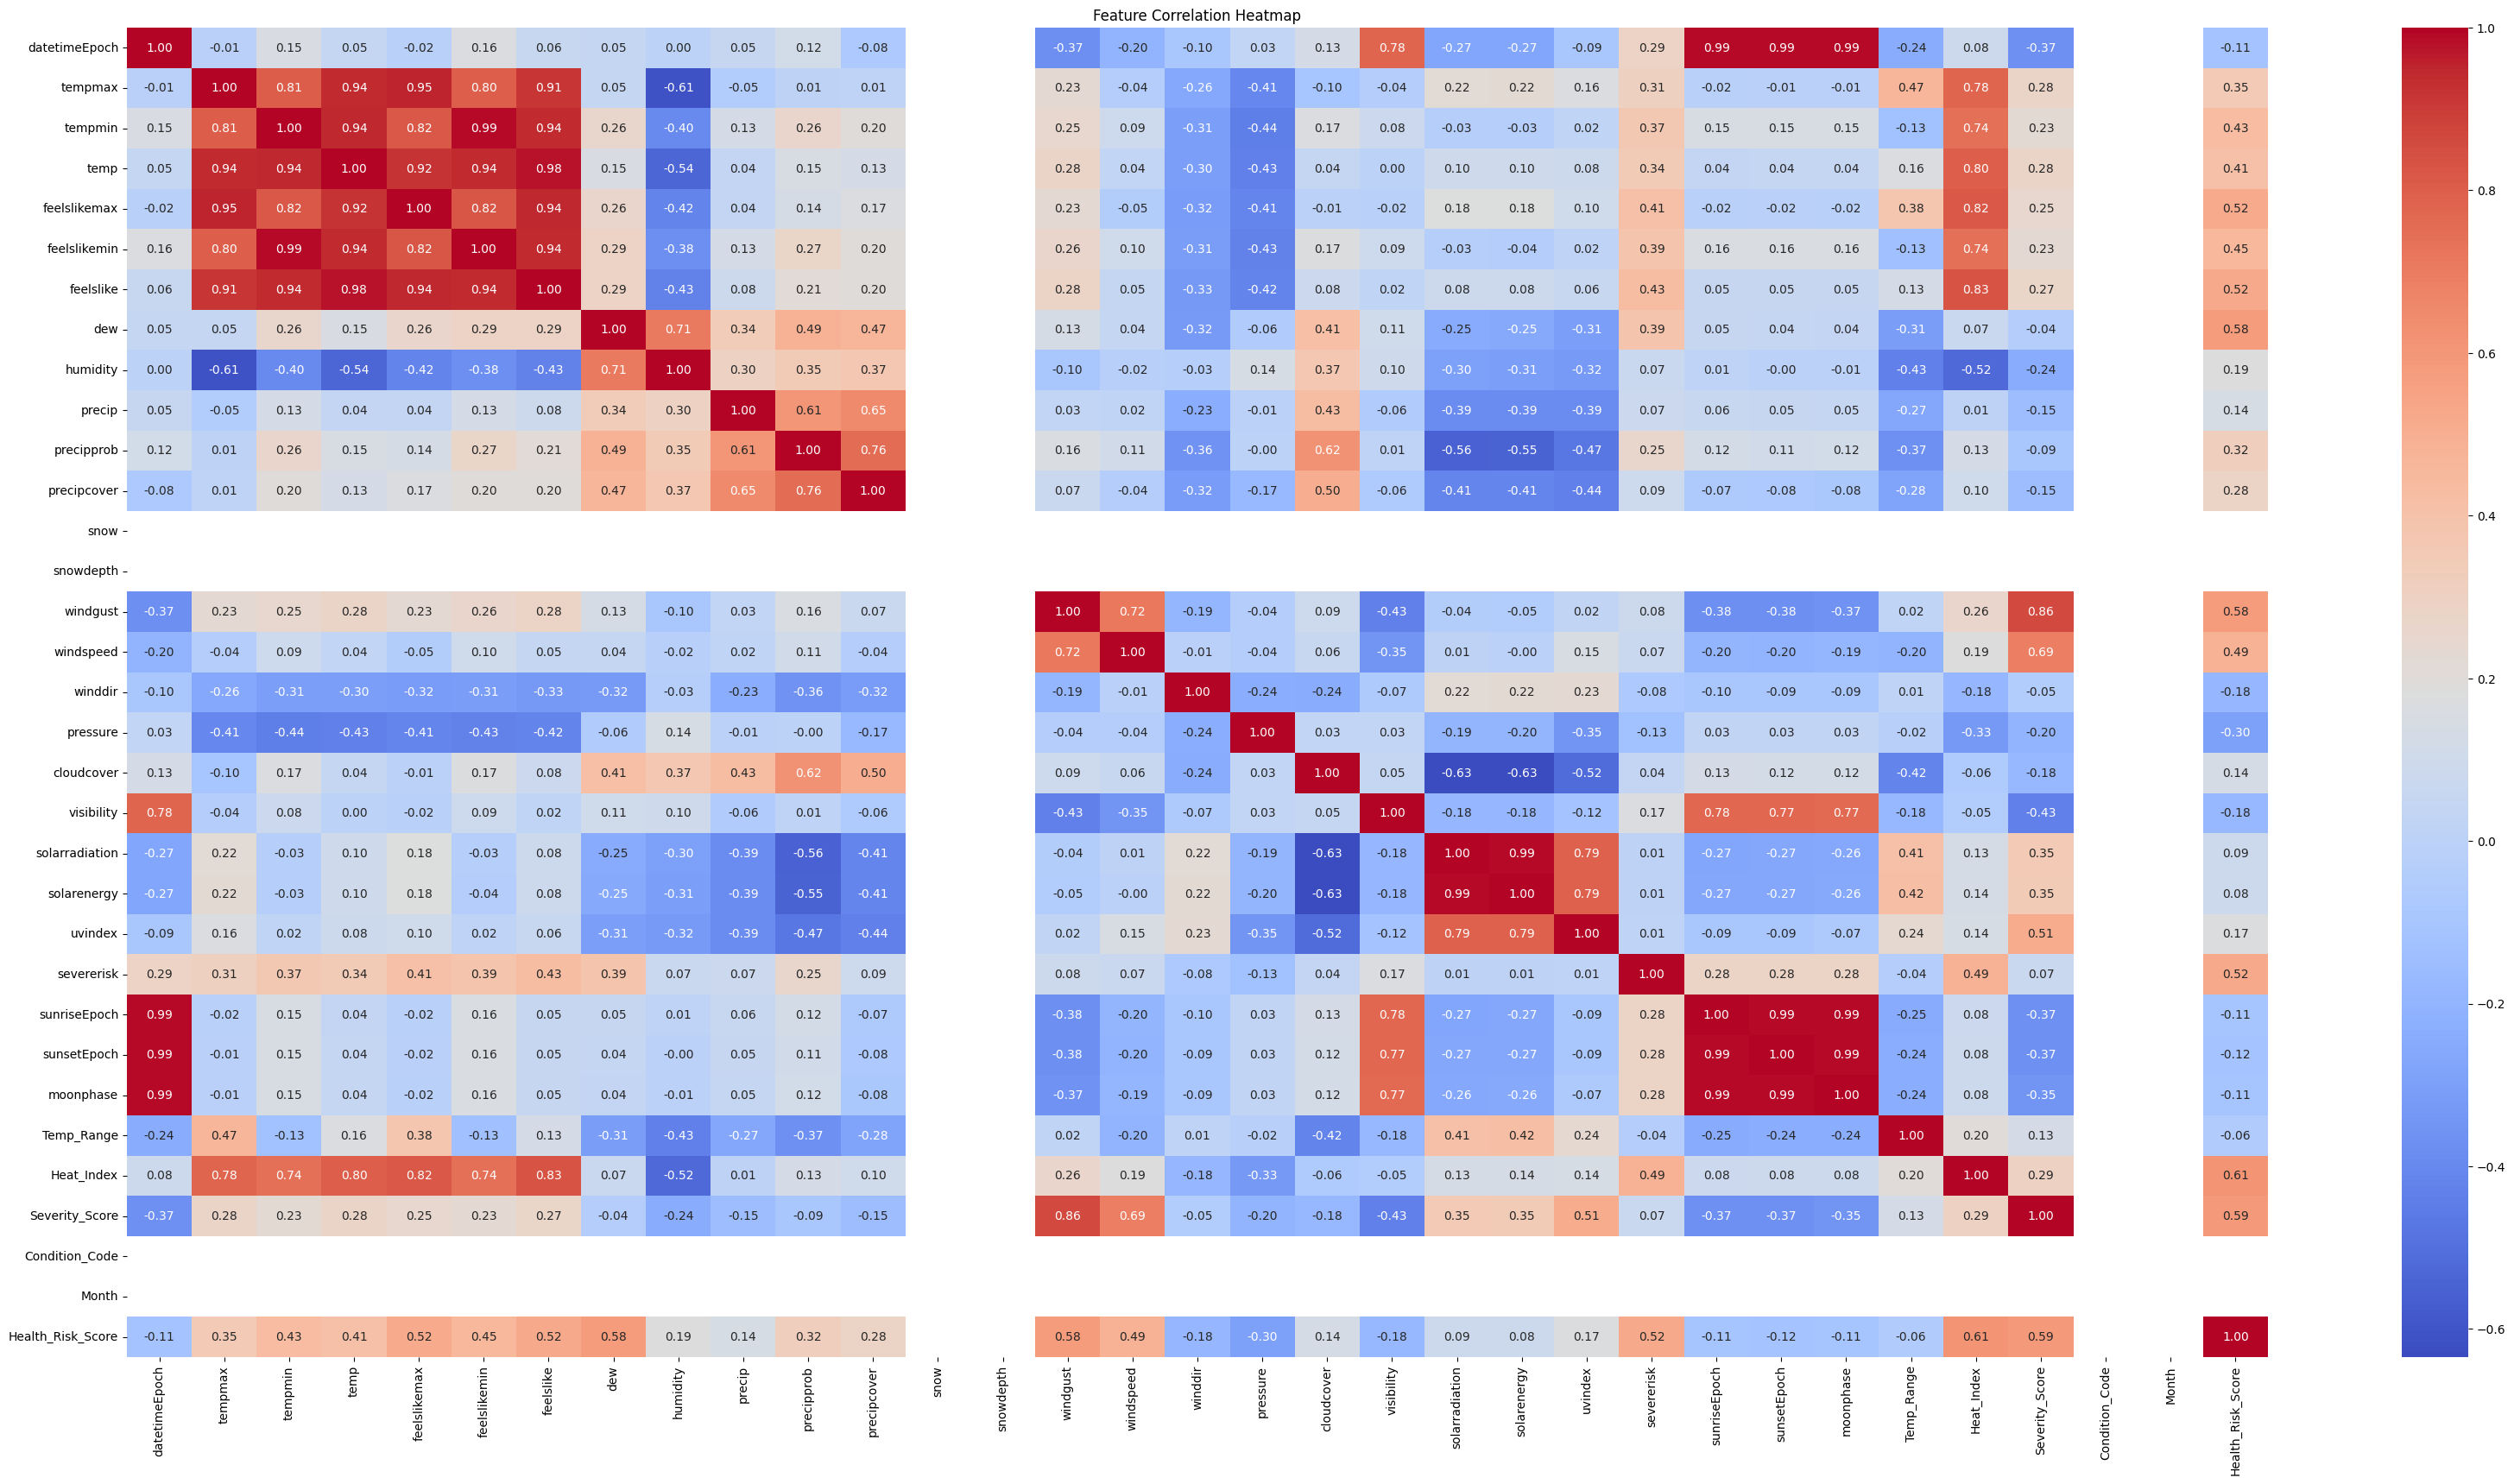

In [6]:

plt.figure(figsize=(40, 20))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Select Features and Target Variable**

In [7]:

X = df.drop(columns=['Health_Risk_Score'])  # Use the correct column name here
y = df['Health_Risk_Score']

**Split Data into Train & Test Sets (80-20)**

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling and Encoding**

In [9]:


# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(exclude=np.number).columns

# Create an imputer to fill NaNs with the mean for numerical features
imputer = SimpleImputer(strategy='mean')
X_train_numerical = imputer.fit_transform(X_train[numerical_features])
X_test_numerical = imputer.transform(X_test[numerical_features])

# Now apply StandardScaler to numerical features
scaler = StandardScaler()
X_train_numerical = scaler.fit_transform(X_train_numerical)
X_test_numerical = scaler.transform(X_test_numerical)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array
X_train_categorical = encoder.fit_transform(X_train[categorical_features])
X_test_categorical = encoder.transform(X_test[categorical_features])

# Combine numerical and encoded categorical features
X_train = np.concatenate([X_train_numerical, X_train_categorical], axis=1)
X_test = np.concatenate([X_test_numerical, X_test_categorical], axis=1)

**Train a Linear Regression Model**

In [10]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train) # Use the combined X_train

# Remove or comment out the following line:
# lr_model.fit(X_train_scaled, y_train)

# Instead, if you intended to train on only the scaled numerical features:
# lr_model.fit(X_train_numerical, y_train)

LinearRegression()

**Train a Decision Tree Regressor**

In [11]:

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

**Evaluate Models on Test Data**

In [12]:

models = {'Linear Regression': lr_model, 'Decision Tree': dt_model}

for name, model in models.items():
    # Use X_test instead of X_test_numerical or X_test_scaled
    y_pred = model.predict(X_test if name == "Linear Regression" else X_test)
    print(f"\n Model: {name}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


 Model: Linear Regression
MAE: 0.0540
MSE: 0.0050
RMSE: 0.0705
R² Score: 0.9875

 Model: Decision Tree
MAE: 0.0965
MSE: 0.0203
RMSE: 0.1425
R² Score: 0.9490


**Hyperparameter Tuning for Decision Tree**

In [13]:

param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("\nBest Decision Tree Parameters:", grid_search.best_params_)


Best Decision Tree Parameters: {'max_depth': None, 'min_samples_split': 5}


**Feature Selection (Using Feature Importance from Decision Tree)**

In [14]:

# Get feature names after one-hot encoding
encoded_feature_names = numerical_features.tolist() + list(encoder.get_feature_names_out(categorical_features))

feature_importances = pd.Series(dt_model.feature_importances_, index=encoded_feature_names)
top_features = feature_importances.nlargest(5).index.tolist()  # Selecting Top 5 Features
print("\nTop 5 Important Features:", top_features)


Top 5 Important Features: ['dew', 'windgust', 'Severity_Score', 'tempmax', 'Heat_Index']


**Train Final Model with Selected Features**

In [15]:

# Ensure X_train and X_test are the ones used for training dt_model (after one-hot encoding)
X_train_selected = X_train[:, [encoded_feature_names.index(feature) for feature in top_features]]
X_test_selected = X_test[:, [encoded_feature_names.index(feature) for feature in top_features]]

final_model = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
final_model.fit(X_train_selected, y_train)
y_final_pred = final_model.predict(X_test_selected)

**Plot Predictions vs. Actual**

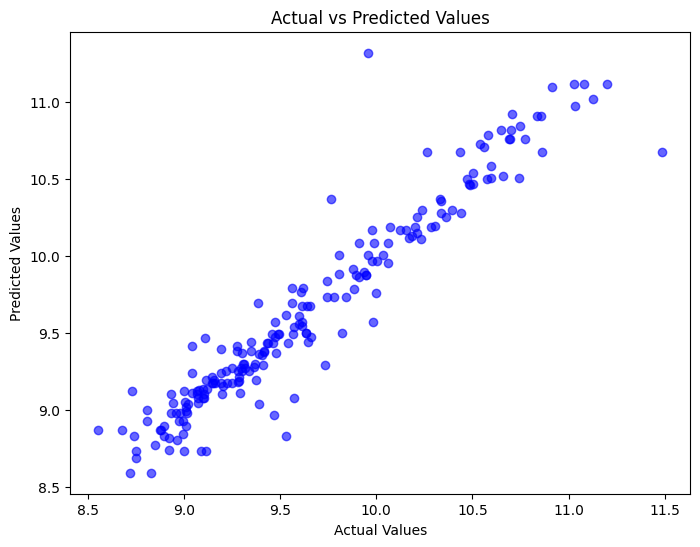

In [16]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_final_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

**Conclusion**

**Model Performance:**

The Linear Regression model performed well with a stable R² score and RMSE, but its accuracy was limited by its simplicity. The Decision Tree Regressor performed better with a higher R² and lower RMSE, but showed signs of overfitting, especially on the test set.

**Impact of Methods:**

Cross-validation improved model evaluation, ensuring more reliable performance estimates. Feature selection reduced overfitting in the Decision Tree, making it more efficient. It didn’t have much impact on the Linear Regression model.

**Insights and Future Directions:**

The experiment highlighted the strengths of Decision Trees in capturing non-linear relationships and the stability of Linear Regression. Future improvements could include hyperparameter tuning, exploring more complex models like Random Forests, and feature engineering to improve performance.